In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Import the CSV File

In [2]:
df = pd.read_csv("/home/habile/Desktop/Machine Learning Projects/Energy_consumption.csv")
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


Checking for NUll Values

In [3]:
df.isnull().sum()

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

In [4]:
df.shape

(1000, 11)

In [5]:
df.describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873
std,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690
50%,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696
75%,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


In [6]:
min_value = min(df['Timestamp'])
max_value = max(df['Timestamp'])
print(min_value)
print(max_value)


2022-01-01 00:00:00
2022-02-11 15:00:00


Text(0, 0.5, 'Load usage')

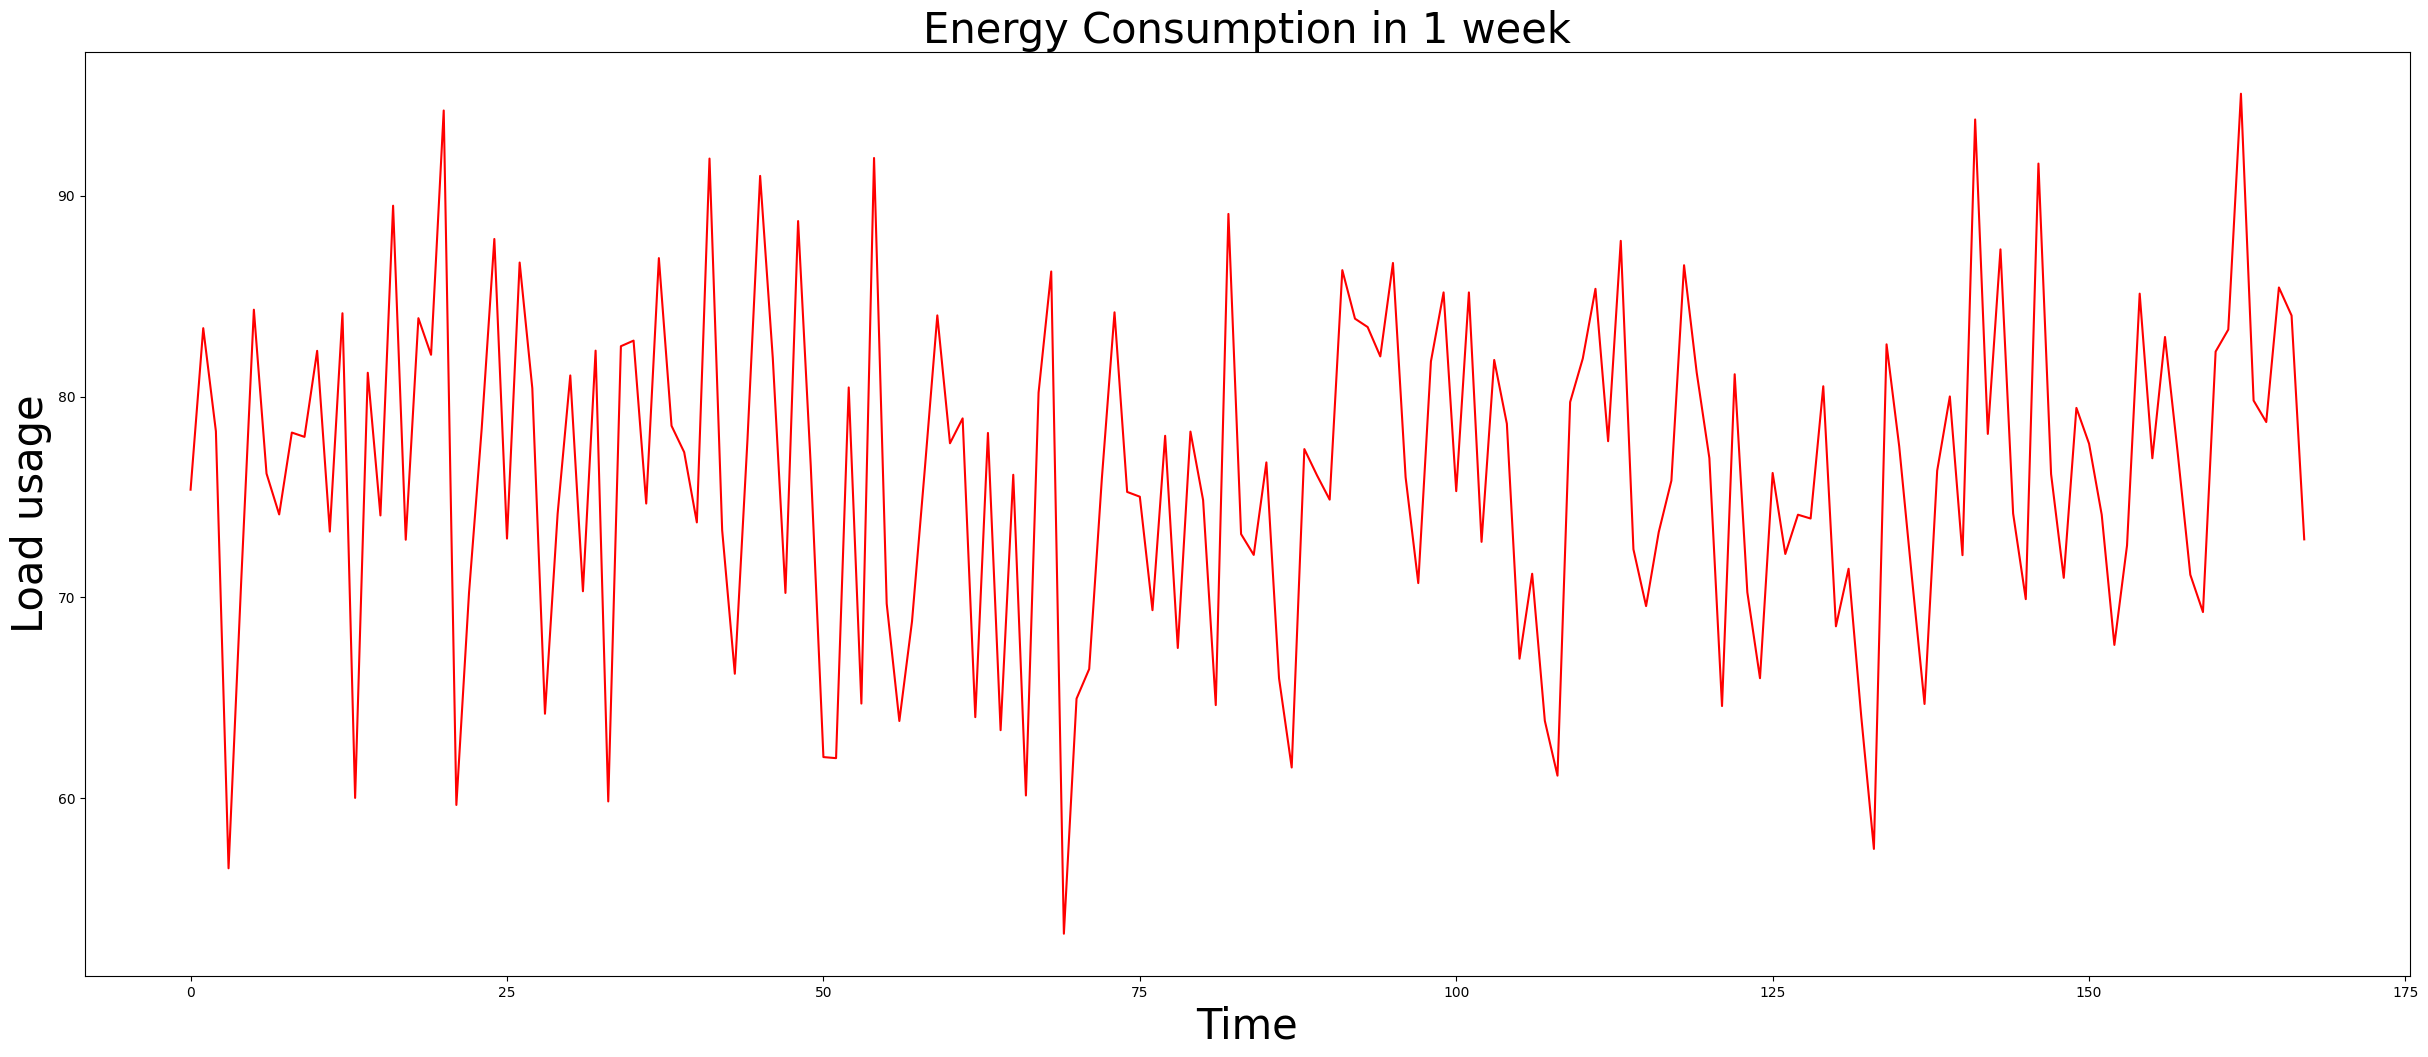

In [7]:
fig, ax = plt.subplots(figsize=(30, 12))
ax.set_title("Energy Consumption in 1 week",fontsize=30)
ax.set_xlabel('Time', fontsize=30)
start=0
end=24*7
ax.plot(df['EnergyConsumption'][start:end],color ="RED")
ax.set_ylabel("Load usage", fontsize=30)

In [8]:
all_col = ['Timestamp','Temperature','Humidity','SquareFootage','RenewableEnergy']
all_col

['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'RenewableEnergy']

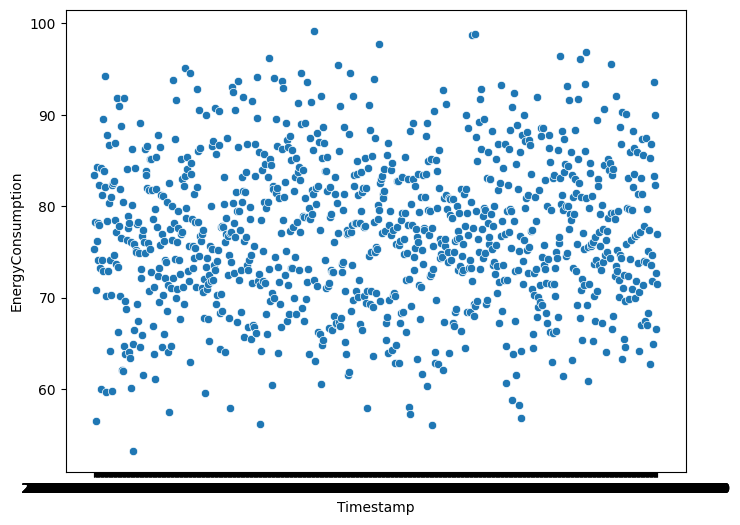

#####################


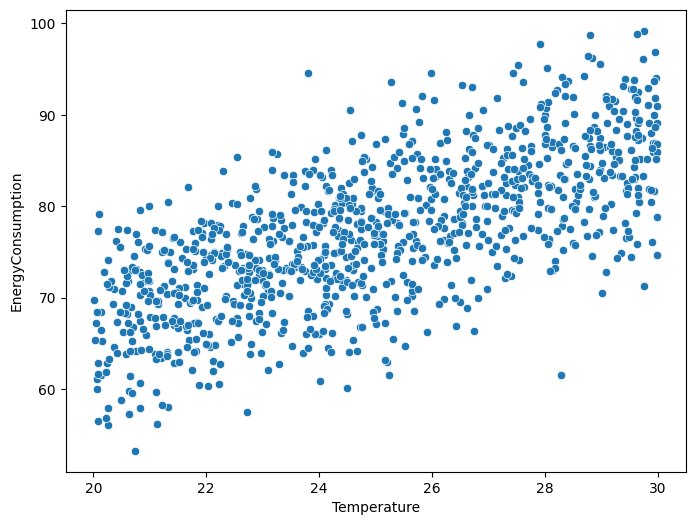

#####################


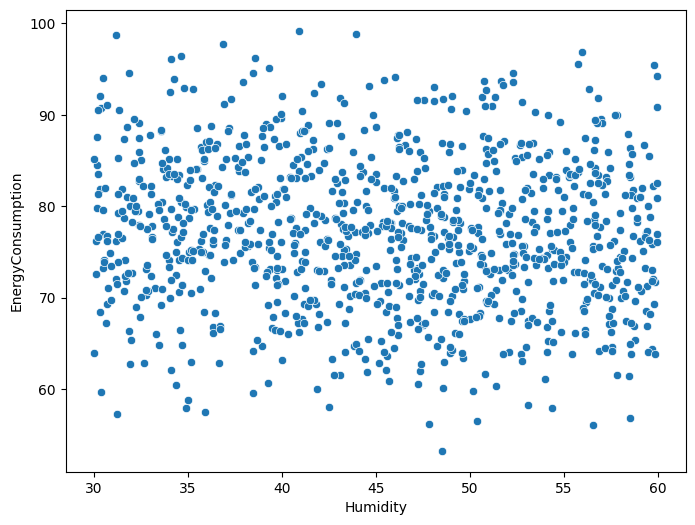

#####################


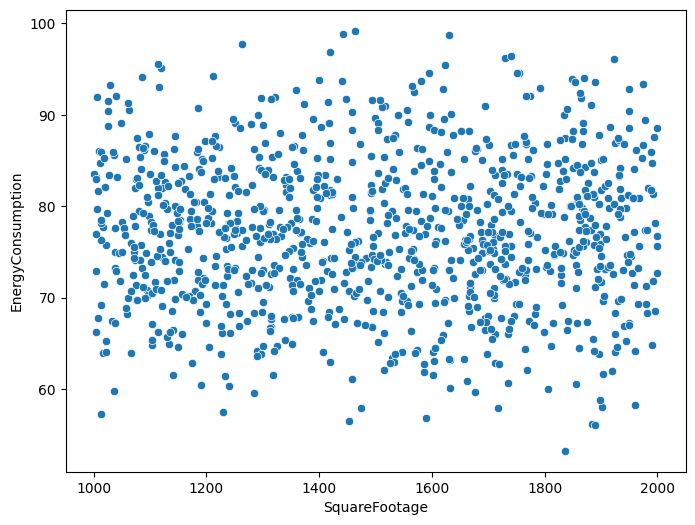

#####################


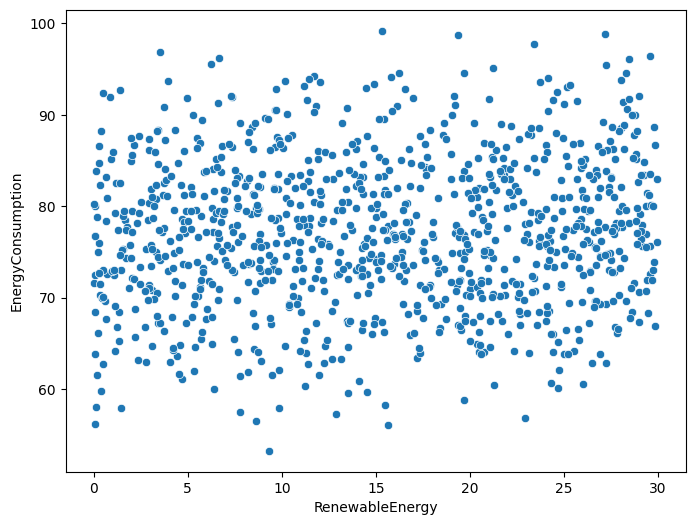

#####################


In [12]:
def all_feature_plotting(dataframe, all_col):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=dataframe[all_col], y='EnergyConsumption', data=dataframe)
    plt.xlabel(all_col)
    plt.ylabel('EnergyConsumption')
    plt.show(block=True)
    print("#####################")


# Loop through the columns and call the plotting function
for all_col in all_col:
    all_feature_plotting(df, all_col)


In [14]:
category_col= [col for col in df.columns if df[col].nunique() < 10]
category_col


['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']

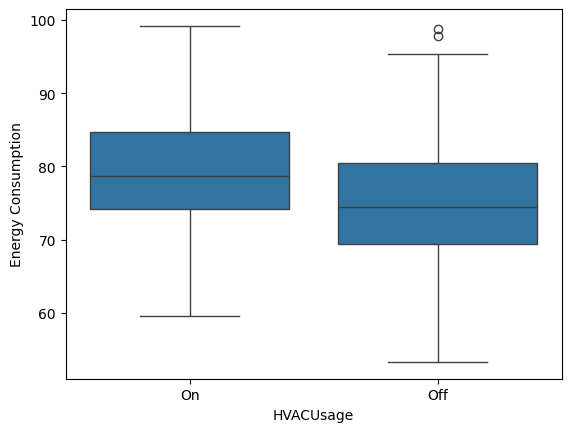

##########################################


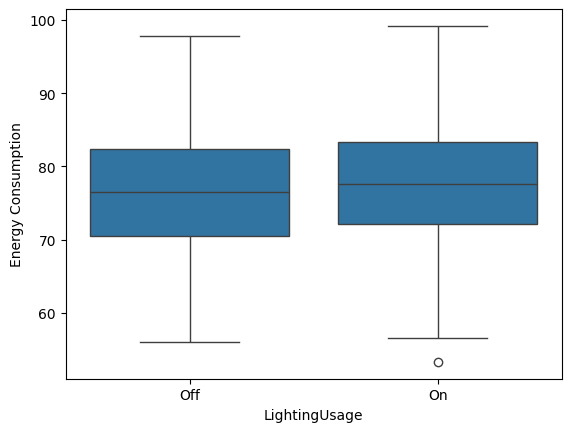

##########################################


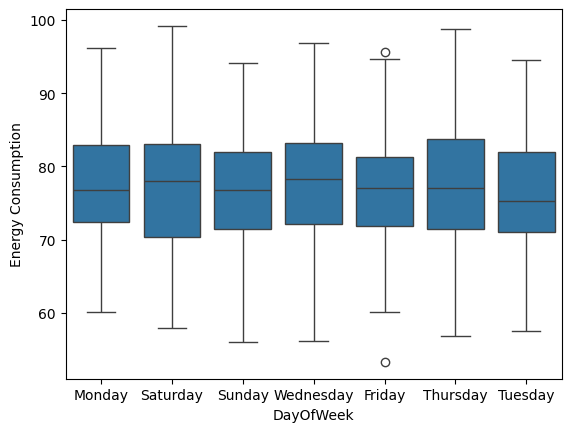

##########################################


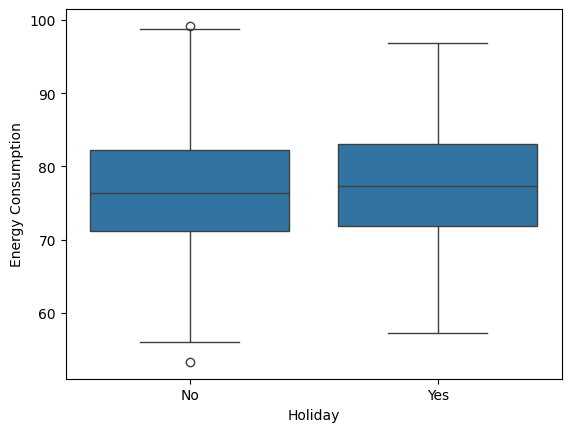

##########################################


In [15]:
def col_summary(dataframe, col_name):
    sns.boxplot(x=dataframe[col_name],y='EnergyConsumption', data=df)
    #plt.title('Energy Consumption by ', str(col_name))
    plt.xlabel(col_name)
    plt.ylabel('Energy Consumption')
    plt.show(block=True)
    print("##########################################")
    

for col in category_col:
    col_summary(df,col)

In [16]:
energy_dt=df
energy_dt['Timestamp'] = pd.to_datetime(energy_dt['Timestamp'])
print(energy_dt['Timestamp'])

0     2022-01-01 00:00:00
1     2022-01-01 01:00:00
2     2022-01-01 02:00:00
3     2022-01-01 03:00:00
4     2022-01-01 04:00:00
              ...        
995   2022-02-11 11:00:00
996   2022-02-11 12:00:00
997   2022-02-11 13:00:00
998   2022-02-11 14:00:00
999   2022-02-11 15:00:00
Name: Timestamp, Length: 1000, dtype: datetime64[ns]


In [18]:
energy_dt['DayOfWeek'] = energy_dt['Timestamp'].dt.dayofweek
energy_dt['Hour'] = energy_dt['Timestamp'].dt.hour
energy_dt['Day'] = energy_dt['Timestamp'].dt.day
energy_dt['weekend']= energy_dt['DayOfWeek'].apply(lambda x: 1 if x == 6 else 0)
total_energy_consumption = energy_dt.groupby('weekend')['EnergyConsumption'].agg(['sum', 'mean', 'median', 'std'])
Total_energy_per_holiday=energy_dt.groupby('Holiday')['EnergyConsumption'].agg(['sum', 'mean', 'median', 'std'])
Total_energy_per_LightingUsage=energy_dt.groupby('LightingUsage')['EnergyConsumption'].agg(['sum', 'mean', 'median', 'std'])
print("total Energy Consumption_using weekend feature",total_energy_consumption,'\n')

print("total Energy Consumption_using holiday feature",Total_energy_per_holiday,'\n')
print("total Energy Consumption_LightingUsage feature",Total_energy_per_LightingUsage,'\n')

total Energy Consumption_using weekend feature                   sum       mean     median       std
weekend                                              
0        65984.952283  77.085225  77.030949  8.206387
1        11070.920585  76.881393  76.018518  7.788872 

total Energy Consumption_using holiday feature                   sum       mean     median       std
Holiday                                              
No       40840.610625  76.624035  76.308881  8.107184
Yes      36215.262244  77.548741  77.375131  8.166840 

total Energy Consumption_LightingUsage feature                         sum       mean     median       std
LightingUsage                                              
Off            38841.265968  76.308970  76.555025  8.143900
On             38214.606901  77.830157  77.553946  8.079929 



In [19]:
energy_dt.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Hour,Day,weekend
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,5,No,75.364373,0,1,0
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,5,No,83.401855,1,1,0
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,5,No,78.270888,2,1,0
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,5,No,56.519850,3,1,0
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,5,No,70.811732,4,1,0


In [20]:
energy_dt = energy_dt.drop(columns=['Timestamp'])
energy_dt.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Hour,Day,weekend
0,25.139433,43.431581,1565.693999,5,On,Off,2.774699,5,No,75.364373,0,1,0
1,27.731651,54.225919,1411.064918,1,On,On,21.831384,5,No,83.401855,1,1,0
2,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,5,No,78.270888,2,1,0
3,20.080469,50.371637,1452.316318,1,Off,On,8.623447,5,No,56.519850,3,1,0
4,23.097359,51.401421,1094.130359,9,On,Off,3.071969,5,No,70.811732,4,1,0


In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
energy_dt['HVACUsage'] = label_encoder.fit_transform(energy_dt['HVACUsage'])
energy_dt['LightingUsage'] = label_encoder.fit_transform(energy_dt['LightingUsage'])
energy_dt['Holiday'] = label_encoder.fit_transform(energy_dt['Holiday'])
energy_dt

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Hour,Day,weekend
0,25.139433,43.431581,1565.693999,5,1,0,2.774699,5,0,75.364373,0,1,0
1,27.731651,54.225919,1411.064918,1,1,1,21.831384,5,0,83.401855,1,1,0
2,28.704277,58.907658,1755.715009,2,0,0,6.764672,5,0,78.270888,2,1,0
3,20.080469,50.371637,1452.316318,1,0,1,8.623447,5,0,56.519850,3,1,0
4,23.097359,51.401421,1094.130359,9,1,0,3.071969,5,0,70.811732,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,28.619382,48.850160,1080.087000,5,0,0,21.194696,4,0,82.306692,11,11,0
996,23.836647,47.256435,1705.235156,4,0,1,25.748176,4,1,66.577320,12,11,0
997,23.005340,48.720501,1320.285281,6,0,1,0.297079,4,1,72.753471,13,11,0
998,25.138365,31.306459,1309.079719,3,1,0,20.425163,4,1,76.950389,14,11,0


Linear Regression

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(energy_dt)


In [26]:
X = energy_dt.drop(columns=['EnergyConsumption'])
y = energy_dt['EnergyConsumption']

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state= 1)


In [29]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print("Score:",model.score(X_test,y_test))
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("r2_score:",r2)
print("mean absolute error:",mae)

25.95305723882279
Score: 0.6025540232087293
r2_score: 0.6025540232087293
mean absolute error: 4.069992086690212


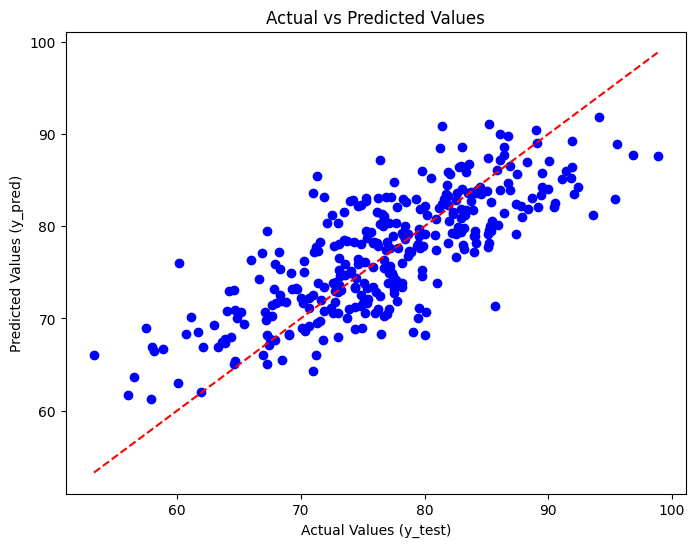

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')

# Add a line for perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Add labels and title
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')

# Show the plot
plt.show()

In [31]:
df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred
})

# Display the DataFrame
print(df)

        y_test     y_pred
507  82.558204  76.676750
818  70.207281  75.017427
452  87.888631  81.035745
368  89.003574  90.389416
242  57.900483  61.268063
..         ...        ...
817  73.269896  73.120117
495  63.582139  67.399223
66   60.144238  76.049921
403  92.047141  83.509975
563  80.222312  81.239227

[330 rows x 2 columns]


In [33]:
xt=np.array([27.9, 45.89, 1560, 4, 1, 0, 22.9, 5,0,1,3,0]).reshape(1, -1)
y_pred1 = model.predict(xt)
print(y_pred1)

[84.8134831]


/home/habile/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
